<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/var_various_ways1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Value at Risk, VaR
In this code, using Geometric Brownian Motion, simulate returns and create distribution. And then find the VaR.


###VaR

Value at risk (VaR): Loss that will be incurred in the event of an extreme adverse price change with some given, usually low, probability. i.e., the worst-case outcome.

1% VaR means that 99% of returns will exceed the VaR and 1% of returns will be worse.

Assuming that portfolio returns are normally distributed, the VaR is fully determined by the mean and SD of the distribution. 

For example, VaR(1%, normal) = Mean - 2.33SD

To obtain a sample estimate of 1%  VaR, we sort the observations from high to low. The VaR is the return at the 1st percentile of the sample distribution.

For example, with 95% confidence, we expect that our worst daily loss will not exceed 4%. If we invest 100 dollars, we are 95% confident that our worst daily loss will not exceed 4 dollars (100 dollars x -4%).



|Confidence Level |Two sided CV   |One sided CV   | 
|---|---|---|
| 90%  |1.64   |1.28   |  
| 95%  |1.96   |1.64   |  
| 99%  |2.58   |2.33   |  

In [1]:
!pip install pandas-datareader
!pip install --upgrade pandas-datareader 
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 311 kB/s 
     |████████████████████████████████| 6.4 MB 29.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resol

In [2]:
import math
import numpy as np
import numpy.random as npr
import pandas as pd  
import pandas_datareader as pdr
import yfinance as yf

import scipy as sp
from scipy.stats import norm

from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'Deja Vu'
%matplotlib inline

In [3]:

sp.stats.norm.ppf(1-.10/2).round(2)

1.64

In [4]:
sp.stats.norm.ppf(1-.05/2).round(2)

1.96

In [5]:
sp.stats.norm.ppf(1-.01/2).round(2)

2.58

In [6]:
sp.stats.norm.ppf(1-.10).round(2)

1.28

In [7]:
sp.stats.norm.ppf(1-.05).round(2)

1.64

In [8]:
sp.stats.norm.ppf(1-.01).round(2)

2.33

In [9]:
def get_prices(tickers, freq_p, st_day, end_day):
    mystock = pd.DataFrame()
    for t in tickers:
        mystock[t] = yf.download(t, start=st_day, end=end_day, interval=freq_p)['Adj Close']
    return mystock

In [68]:
# for short time horizons er will be small, and therefore VaR estimations
# will not be much influenced by it
# assuming that portfolio is normally distributed, 

def var_calc(CL, days, p_val, vol, t):

  VaR = p_val * vol * np.sqrt(t/days) * norm.ppf(CL)
  percent_loss = -VaR/p_val *100

  print("Assuming that we invest {:.2f}, for the next {:.1f} trading days".format(p_val, days))
  print("At {:.3f} confidence level, loss will not exceed {:,.2f}".format(CL, VaR))
  print("This represents a move of {:.2f} standard deviations below the expected return,\
  or a loss of {:.2f}%.".format(norm.ppf(CL), percent_loss))
 
  return

In [76]:
tic=['SPY', 'TLT', 'TSLA', 'AAPL', 'NVDA', 'BAC', 'WMT']
prices= get_prices(tic, freq_p='1wk', st_day="2011-01-01", end_day="2022-05-31")  # id , 1wk, 1mo
print(prices)

print(len(tic))
#prices.rename(columns={"TSLA": "Your_Stock", "SPY":"INDEX"}, inplace=True)

prices.info()
prices.tail(20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   SPY         TLT        TSLA        AAPL        NVDA  \
Date                                                                     
2011-01-01  102.503967   69.571968    5.648000   10.263882    4.562420   
2011-01-08  104.245461   69.187737    5.150000   10.641311    5.416582   
2011-01-15  103.495644   68.946732    4.608000    9.976838    5.102013   
2011-01-22  102.971565   69.248016    4.802000   10.263269    5.455616   
2011-01-29  105.736938   66.905075    4.692000   10.580847    5.894179   

,SPY,TLT,TSLA,AAPL,NVDA,BAC,WMT
Date,,,,,,,
2022-01-15,436.623596,142.778458,943.900024,161.965378,233.700195,44.701435,139.144104
2022-01-22,440.581299,142.281403,846.349976,169.863693,228.361084,45.646816,136.494019
2022-01-29,447.310394,138.185822,923.320007,171.918045,243.148575,48.045090,138.290512
2022-02-05,439.095886,137.621704,860.000000,168.392593,239.449203,47.686840,134.320358
2022-02-12,432.885193,137.601791,856.979980,167.054550,236.379730,45.736378,136.960510
2022-02-19,436.394287,136.247955,809.869995,164.608154,241.528854,44.800953,135.362518
2022-02-26,430.831573,139.602676,838.289978,162.930603,229.320923,40.750755,141.754486
2022-03-05,418.769043,134.474747,795.349976,154.502991,221.000000,40.330002,141.010086
2022-03-12,443.143311,133.009491,905.390015,163.739426,264.529999,42.900002,144.354935


In [74]:
stock='SPY'
print("volatility = {:.2f}".format(np.std(prices[stock].pct_change())))

var_calc(.95, 252, prices[stock][-1], np.std(prices[stock].pct_change())*np.sqrt(252), 21)


volatility = 0.02
Assuming that we invest 415.26, for the next 252.0 trading days
At 0.950 confidence level, loss will not exceed 67.56
This represents a move of 1.64 standard deviations below the expected return,  or a loss of -16.27%.


In [88]:
for t in tic:
  print("annual volatility of {} = {:.4f}".format(t, np.std(prices[t].pct_change()*np.sqrt(252))))
  var_calc(.95, 252, prices[t][-1], np.std(prices[t].pct_change())*np.sqrt(252), 21)
  print(45 * "-")
return

annual volatility of SPY = 0.3427
Assuming that we invest 415.26, for the next 252.0 trading days
At 0.950 confidence level, loss will not exceed 67.56
This represents a move of 1.64 standard deviations below the expected return,  or a loss of -16.27%.
---------------------------------------------
annual volatility of TLT = 0.2965
Assuming that we invest 119.08, for the next 252.0 trading days
At 0.950 confidence level, loss will not exceed 16.77
This represents a move of 1.64 standard deviations below the expected return,  or a loss of -14.08%.
---------------------------------------------
annual volatility of TSLA = 1.1661
Assuming that we invest 759.63, for the next 252.0 trading days
At 0.950 confidence level, loss will not exceed 420.60
This represents a move of 1.64 standard deviations below the expected return,  or a loss of -55.37%.
---------------------------------------------
annual volatility of AAPL = 0.5918
Assuming that we invest 149.64, for the next 252.0 trading days
At

SyntaxError: ignored

In [13]:
var_calc(.975, 252, 760000, .307, 21)

Assuming that we invest 760000.00, for the next 252.0 trading days
At 0.975 confidence level, loss will not exceed 132,010.79
This represents a move of 1.96 standard deviations below the expected return,  or a loss of -17.37%.


In [14]:
var_calc(.99, 252, 760000, .307, 21)

Assuming that we invest 760000.00, for the next 252.0 trading days
At 0.990 confidence level, loss will not exceed 156,688.10
This represents a move of 2.33 standard deviations below the expected return,  or a loss of -20.62%.


In [15]:
def print_statistics(a1, a2):
    '''
    Parameters
    ==========
    a1, a2: ndarray objects
        results objects from simulation
    '''

    sta1 = scs.describe(a1)  
    sta2 = scs.describe(a2)  
    print('%14s %14s %14s' % ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [16]:
# checking the Z score for 90%
cutoff = norm.ppf(.90)
cutoff.round(2)

1.28

In [18]:
# checking the Z score for 95%
cutoff = norm.ppf(.95)
cutoff.round(2)

1.64

In [19]:
# checking the Z score for 99%
cutoff = norm.ppf(.99)
cutoff.round(2)

2.33

### Let's assume that we buy 5000 shares of AAPL. And using historical returns, let's estimate mean and standard deviation of returns on AAPL. In order to save time, let's assume they are 19% and 30.7%, respectively. 

In [20]:
aapl = 5000
aapl_price = pdr.get_quote_yahoo('AAPL')['price'] # the most recent price
aapl_value = aapl * aapl_price
aapl_value = aapl_value.at['AAPL']
t = 21/252
mu = .19
volatility = .307
iterations = 50000

In [21]:
type(aapl_price)

pandas.core.series.Series

In [22]:
aapl_price.describe()

count      1.00
mean     149.64
std         NaN
min      149.64
25%      149.64
50%      149.64
75%      149.64
max      149.64
Name: price, dtype: float64

In [23]:
# checking to see what get_quote_yahoo is retreveing
pdr.get_quote_yahoo('AAPL')


,language,region,quoteType,typeDisp,quoteSourceName,triggerable,customPriceAlertConfidence,currency,marketState,exchange,...,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,displayName,price
AAPL,en-US,US,EQUITY,Equity,Nasdaq Real Time Price,True,HIGH,USD,PREPRE,NMS,...,-10.934799,-0.068098,159.5,-9.860001,-0.061818,2421953134592,22.810976,35.988457,Apple,149.64


In [24]:
type(aapl_price)

pandas.core.series.Series

In [36]:
type(aapl_value)

numpy.float64

In [25]:
aapl_price

AAPL    149.64
Name: price, dtype: float64

In [26]:
# aapl_value = # of shares times price
aapl_value

748199.9999999999

Below, let's simulate future value from Geometric Brownian Motion series. 

In [27]:
def VaR(pv, mu, vol, T, iterations):
    end = pv * np.exp((mu - .5 * vol ** 2) * T + 
                     vol * np.sqrt(T) * np.random.standard_normal(iterations))
    ending_values = end - pv
    return ending_values

In [28]:
at_risk = VaR(aapl_value, mu, volatility, t, iterations)
at_risk

array([-62977.59170656, 158910.75326638, -87145.21706447, ...,
         7653.68933825, 112065.98402093, -48413.28814646])

In [29]:
type(at_risk)

numpy.ndarray

In [30]:
np.shape(at_risk)

(50000,)

In [31]:
np.ndim(at_risk)

1

In [35]:
at_risk.mean()

11546.088051856394

In [32]:
at_risk.std()

67440.97653546024

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 9.000e+00, 1.500e+01, 1.600e+01, 2.200e+01,
        2.600e+01, 5.700e+01, 6.400e+01, 9.200e+01, 1.170e+02, 1.540e+02,
        1.630e+02, 2.140e+02, 2.710e+02, 3.260e+02, 4.100e+02, 4.870e+02,
        5.220e+02, 6.380e+02, 7.330e+02, 7.810e+02, 8.630e+02, 1.004e+03,
        1.091e+03, 1.173e+03, 1.232e+03, 1.319e+03, 1.442e+03, 1.532e+03,
        1.648e+03, 1.629e+03, 1.654e+03, 1.728e+03, 1.616e+03, 1.711e+03,
        1.735e+03, 1.645e+03, 1.555e+03, 1.593e+03, 1.539e+03, 1.468e+03,
        1.414e+03, 1.382e+03, 1.254e+03, 1.170e+03, 1.043e+03, 1.036e+03,
        9.490e+02, 8.680e+02, 7.850e+02, 7.220e+02, 6.470e+02, 5.630e+02,
        4.750e+02, 4.330e+02, 3.920e+02, 3.680e+02, 3.150e+02, 2.940e+02,
        2.350e+02, 2.130e+02, 1.730e+02, 1.580e+02, 1.400e+02, 1.030e+02,
        1.040e+02, 8.100e+01, 6.800e+01, 4.600e+01, 3.500e+01, 4.100e+01,
        3.000e+01, 3.000e+01, 2.100e+0

findfont: Font family ['Deja Vu'] not found. Falling back to DejaVu Sans.


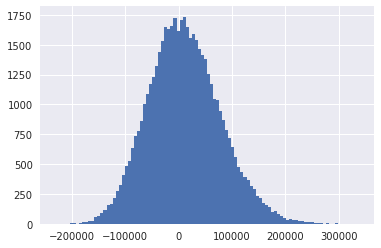

In [34]:
plt.hist(at_risk,bins=100)

In [33]:
percentiles = [1,5,10]
np.percentile(at_risk, percentiles)

array([-131743.8070597 ,  -94237.39447714,  -73070.83419235])